# Chapter 3
## Data Manipulation

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

# The line below one is only needed for this workshop
from done import imdone, quizanswer

In [2]:
# Make figures bigger in presentation
from matplotlib import rcParams
rcParams['figure.dpi'] = 144

We already saw a small example at the end of chapter 1 when we talked about data sanitation. We filtered the data in such a way that we only saw the names that were only one letter long.

Here we will again focus on the baby names data set. So load the CSV again as we did before.
### Exercise 3.1
Load `data/ontariobabynames.csv` and store the result in the object `babynames`.

In [3]:
# Solution (HIDEME)
babynames = pd.read_csv('data/ontariobabynames.csv')

In [ ]:
imdone(3,1)

## Selecting Data

Remember from chapter 1, we can select data by column by using the column name, by index using the data frame index number (usually the same as the array index, but not always!), or with `iloc` using the raw array indices. 

`iloc` is faster since there is no comparison of labels. Most of the times, you won't notice a difference, but if you are doing many operations, you may want to use this.

In [ ]:
# Gets the 123457th element of the third column. Remember that array indices start at zero
babynames.iloc[123456,2]

However, there is one peculiarity about selecting by column. If you select a column through `df["colname"]` you get an Python array back. If you select a column through `df[["colname"]]` you get a DataFrame.

It's preferable to keeping a DataFrame because that preserves the column name and keeps access to the DataFrame functions. It's also in line with how you select multiple columns through `df[["colname1","colname1"]]`. You are giving a list of columnnames.

However, when comparing the raw data of a column like you do when selecting with `df["colname"] == "something"`, you should still keep the single \[ \].

In [ ]:
babynames["count"]

In [ ]:
babynames[["count"]]

## Filtering
If we try to plot the number of babynames as a function of time, it will not be very illuminating. Also, this takes some time considering that we have almost one million rows in our data set depending on how busy Syzygy is, so don't try to run the next line.

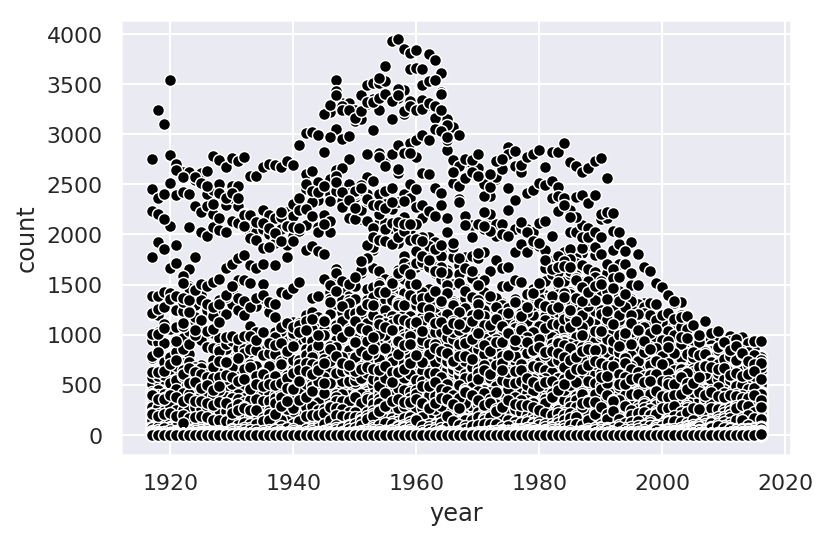

In [4]:
sns.scatterplot("year", "count", color="black", data=babynames)

Instead we would like to pick out one name and use that. How to do that?

Luckily pandas is build for this sort of thing. We can tell pandas to only select certain rows based on criteria we provide. The syntax is
```
dataframe[some condition]
```
where `some condition` is something we would like to select on. You can see this is similar to selecting rows or columns as we saw before.

The conditions are in the form of
```
dataframe["column name"] == "something"
```

So let's try that out. We can look at the popularity of the female name Mary.

In [13]:
babynames[babynames["name"] == "Mary"].head()

,year,sex,name,count,prop
290400,1917,F,Mary,765,0.012714
290401,1918,F,Mary,636,0.010570
290402,1919,F,Mary,480,0.007977
290403,1920,F,Mary,555,0.009224
290404,1921,F,Mary,2396,0.039819


### Exercise 3.2
Plot your own name as a function of time. Fill in the `...` below. If your name is not in the data, you'll be happy to know that you are very unique. However, you'll also get an empty result. For the purpose of this exercise, just use any other name.  Run the cell with `imdone(3,2)` when you are done.

In [ ]:
babynames[babynames["name"] == "..."].head()

In [ ]:
imdone(3,2)

In [21]:
# Solution (HIDEME)
babynames[babynames["name"] == "Emily"].head()

,year,sex,name,count,prop
130000,1917,F,Emily,64,0.001064
130001,1918,F,Emily,71,0.001180
130002,1919,F,Emily,63,0.001047
130003,1920,F,Emily,71,0.001180
130004,1921,F,Emily,64,0.001064


If you happen to be male, you may notice that it is showing female babies if you name is used by all genders. We'll get to that in a minute, but in the mean time, you can use `tail()` to see the bottom of the dataframe.

## Logical tests
When we selected all of the female babies named Mary and Marie we used logical tests. These are statements that are either `True` or `False`. There are various comparisons possible

| Notation | `True` if                           |
| -------  | ----------------------------------- |
| `x < y`  | `x` is less than `y`                |
| `x > y`  | `x` is greater than `y`             |
| `x == y` | `x` is equal to `y`                 |
| `x <= y` | `x` is less than or equal to `y`    |
| `x >= y` | `x` is greater than or equal to `y` |
| `x != y` | `x` is not equal to `y`             |
| `x.isin(["a","b"])` | `x` is either "a" or "b" |

In [ ]:
x = 1

In [ ]:
x > 2

### Quiz 3.1
From chapter 1 we saw various possibilities for values, like `1` and `"one"`.

There is another value called `nan` (denoted as `np.nan` since it is part of Numpy).

What might `nan` stand for?

<div style="margin-bottom: 20em;" />

### Quiz 3.2
What is the result?

```
1 == 1
```

<div style="margin-bottom: 20em;" />

### Quiz 3.2
What is the result?

```
1 == np.nan
```

<div style="margin-bottom: 20em;" />

### Quiz 3.4
What is the result?

```
np.nan == np.nan
```

<div style="margin-bottom: 20em;" />

## Logical tests, now with isna

| Notation | `True` if                           |
| -------  | ----------------------------------- |
| `x < y`  | `x` is less than `y`                |
| `x > y`  | `x` is greater than `y`             |
| `x == y` | `x` is equal to `y`                 |
| `x <= y` | `x` is less than or equal to `y`    |
| `x >= y` | `x` is greater than or equal to `y` |
| `x != y` | `x` is not equal to `y`             |
| `x["column"].isin(["a","b"])` | `x` is either "a" or "b" |
| `pd.isna(x)` | `x` is a missing value          |
| `!pd.isna(x)` | `x` is not a missing value          |

### Exercise 3.3
Using the logical tests and the selection method, find:
- All of the rows where prop is greater than or equal to 0.06
- All of the children named "Alberta"

In [ ]:
imdone(3,3)

In [ ]:
# Solution (HIDEME)
babynames[babynames["prop"] >= 0.06]

In [ ]:
# Solution (HIDEME)
babynames[babynames["name"] == "Alberta"]

## Common mistakes
Beware, `==` and `=` mean different things! `==` is the comparison operator, `=` is the assignment operator.

Also, remember the quotes. `"hello"` is a string value, `hello` is an object.
## Boolean operators
Logical statements can be combined to make more complex version.

| Operator in dataframes | Operator for variables | Meaning |
| -------- | ------- | ------- |
| `&`      | `and`   | and     |
| `\|`     | `or`    | or      |
| `!`      | `not`   | not     |
| `(  )`   | `(  )`  | group tests |

```
x = 2

(x >= 2) & (x < 3)
True & True
True
```

### Exercise 3.4
- Find the boys named Mary
- Find the names that were used by exactly 5 or 6 children in 1920
- Find the names that are either John, Jon, Johnny or Johnnie

In [ ]:
imdone(3,4)

In [ ]:
# Solution (HIDEME)
babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "M")]

In [ ]:
# Solution (HIDEME)
babynames[((babynames["count"] == 5) | (babynames["count"] == 6)) & (babynames["year"] == 1920)]

In [ ]:
# Solution (HIDEME)
babynames[babynames["name"].isin(["John", "Jon", "Johnny", "Johnnie"])]

## More common mistakes
### Combining test into one
Wrong: `10 < df["n"] < 20`<br />
Right: `(10 < df["n"]) & df["n"] < 20`

### Making too many tests
"Wrong": `df[(df["colname"] == "a") & (df["colname"] == "b") & (df["colname"] == "c")]`<br />
Right: `df[df["colname"].isin(["a", "b", "c"])]`

## Sorting
Pandas allows you to sort data based on columns using the function `sort_values`. So for our `babynames` DataFrame, we can use `babynames.sort_values`. Let's look at the help to see what the options are.

In [ ]:
help(babynames.sort_values)

### Exercise 3.5
Use `sort_values` to find the largest value of "count".

Combine your knowledge of `sort_values` and the selection rules in this chapter to find the smallest value of "count" that is not zero.

In [ ]:
imdone(3,5)

In [ ]:
# Solution (HIDEME)
babynames.sort_values("count", ascending=False).head(10)

In [ ]:
# Solution (HIDEME)
babynames[babynames["count"] > 0].sort_values("count").head()

We can combine all of these actions by storing the intermediate result. For example, if we want the name and number of the boy babies from 2015 sorted by number, we can do that!

In [ ]:
boys_2015 = babynames[(babynames["year"] == 2015) & (babynames["sex"] == "M")]
boys_2015 = boys_2015[["name", "count"]]
boys_2015 = boys_2015.sort_values(by="count", ascending=False)
boys_2015.head(10)

You can also stick is all together, but it doesn't look very pretty...

In [ ]:
babynames[(babynames["year"] == 2015) & (babynames["sex"] == "M")][["name", "count"]].sort_values(by="count", ascending=False).head(10)

### Excercise 3.6
Find the female babies born in 2007, keep only the name and count column and find the most popular names

In [ ]:
imdone(3,6)

In [ ]:
girls_2017 = babynames[(babynames["year"] == 2007) & (babynames["sex"] == "F")]
girls_2017 = girls_2017[["name", "count"]]
girls_2017 = girls_2017.sort_values(by="count", ascending=False)
girls_2017.head(10)

## Plotting
Now plotting can be done by calling the plot function and, as before, specifying which columns needs to be plotted. Here we plot the number of female babies named Mary as a function of time.

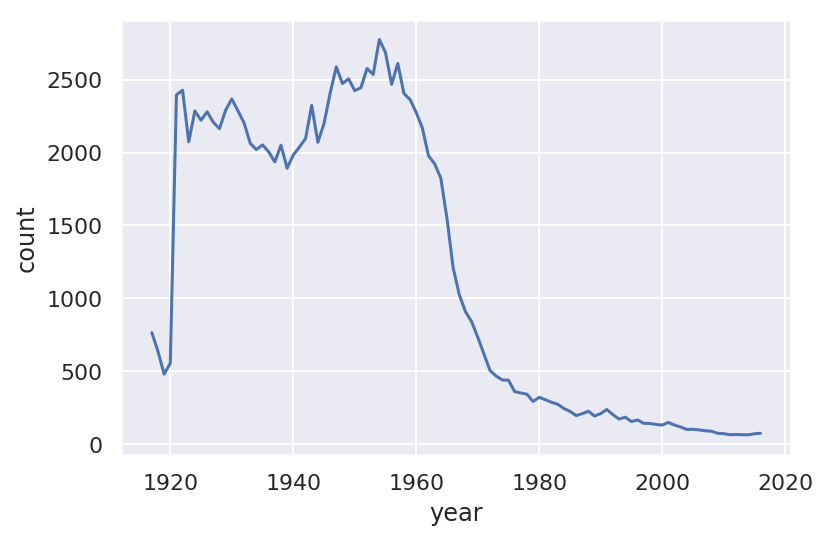

In [6]:
sns.lineplot("year", "count", data=femalemarys)

This can also be combined in a single statement, although it doesn't exactly help readability.

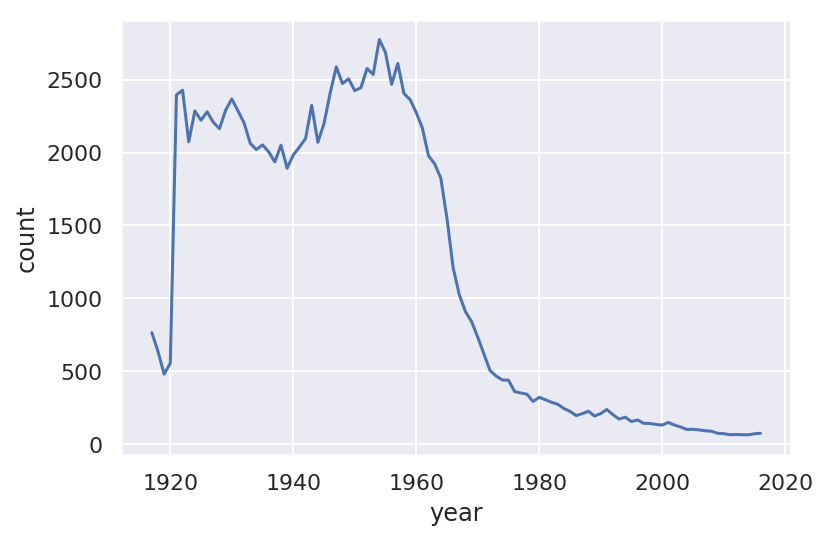

In [7]:
sns.lineplot("year", "count", data=babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")])

Let's get the female babies name Marie too.

In [8]:
femalemaries = babynames[(babynames["name"] == "Marie") & (babynames["sex"] == "F")]

Trying to plot both means that Seaborn will make it into one plot for you as we saw in the previous chapter.

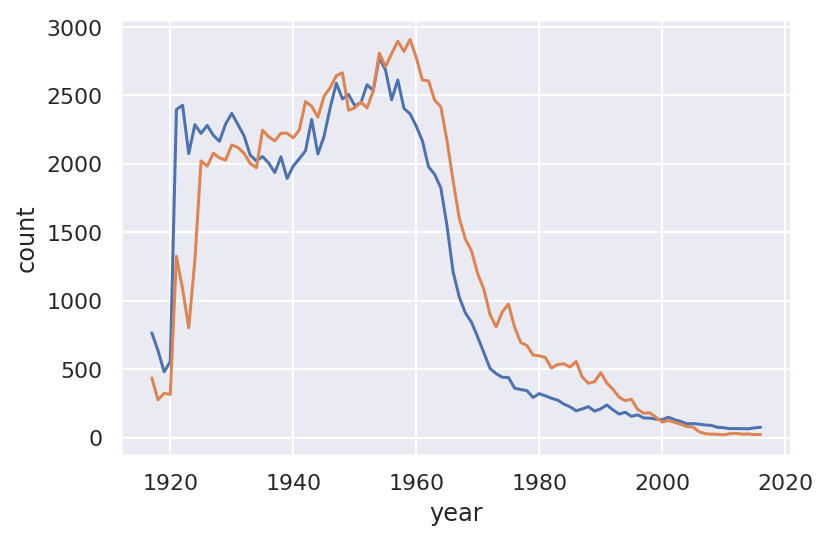

In [9]:
sns.lineplot("year", "count", data=femalemarys)
sns.lineplot("year", "count", data=femalemaries)

But again, FacetGrid plots, like those produced by `relplot` work slightly different. For those, you need to modify the data to be in the proper format. We will get to that later.

### Exercise 3.7 - mini-exam!

1. Trim babynames to just the rows that contain your name and your sex (or use a different name/sex if it wasn't in babynames)
2. Trim the result to just the columns that will appear in your graph (not strictly necessary, but useful practice)
3. Plot the results as a line graph with year on the x axis and prop on the y axis

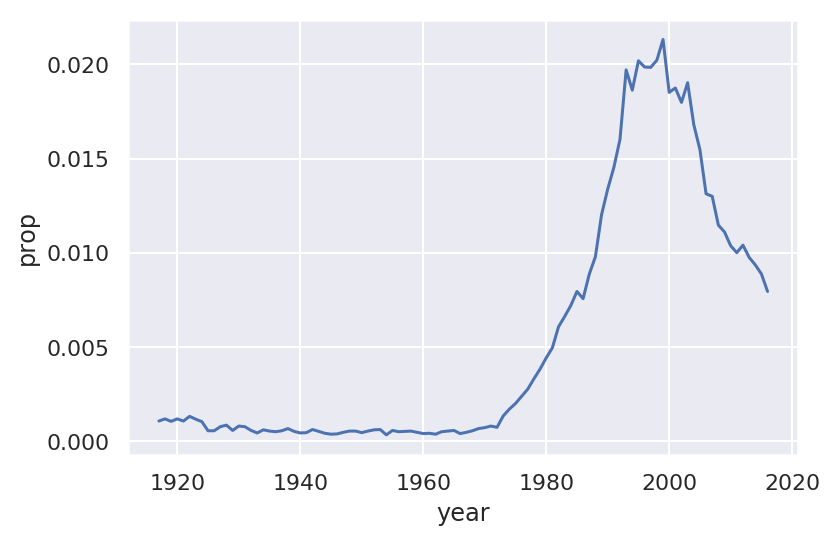

In [11]:
# Solution (HIDEME)
yourname = babynames[(babynames["name"] == "Emily") & (babynames["sex"] == "F")]
yourname = yourname[["year", "prop"]]
sns.lineplot("year", "prop", data=yourname)

In [ ]:
imdone(3,7)

### Quiz 3.5

Do we have enough information to:
- Calculate the total number of children with each name?

<div style="margin-bottom: 20em;" />

## Statistical functions

Panda dataframe have a number of statistical functions. For example `sum()`, `max()`, `min()`, `count()` and lots more. These can be applied to columns of data frames.

For example, to get the total number of babies in our dataset we can take the sum of the "count" column.

In [4]:
babynames["count"].sum()

10349108

In [6]:
babynames["count"].max()

3946

In [17]:
babynames["name"].nunique()

8087

It also works without specifying the column name, it will do it for all of the columns. It's a lot of extra work though, so it's usually faster to select the column you are interested in and then apply the function.

In [16]:
babynames.count()

year     856100
sex      856100
name     856100
count    856100
prop     856100
dtype: int64

### Exercise 3.8
Extract the rows where name == "Khaleesi". Then use sum() and min() to find:
1. The total number of children named Khaleesi
2. The first year Khaleesi appeared in the data

In [23]:
# Solution (HIDEME)
khaleesi_count = babynames[babynames["name"] == "Khaleesi"]
khaleesi_count = khaleesi_count["count"]
khaleesi_count.sum()

41

In [14]:
# Solution (HIDEME)
khaleesi_first = babynames[(babynames["name"] == "Khaleesi") & (babynames["count"] > 0)]
khaleesi_first = khaleesi_first["year"]
khaleesi_first.min()

2012

In [ ]:
imdone(3,8)

## Grouping
By "group by" we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

We saw that we could get the total number of babies named "Khaleesi", but can we do this for all of the baby names?

Let's see how grouping works first!

We'll use a small demo dataframe first, and then it's your turn.

In [22]:
pollution = pd.DataFrame(
    {
        "city": [
            "New York",
            "New York",
            "London",
            "London",
            "Beijing",
            "Beijing",
        ],
        "size": [
            "large",
            "small",
            "large",
            "small",
            "large",
            "small",
        ],
        "amount": [
            23,
            14,
            22,
            16,
            121,
            56,
        ]
    })

In [23]:
pollution

,city,size,amount
0,New York,large,23
1,New York,small,14
2,London,large,22
3,London,small,16
4,Beijing,large,121
5,Beijing,small,56


We can get the stats for the full data set

In [115]:
pollution[["amount"]].mean()

amount    42.0
dtype: float64

In [128]:
pollution[["amount"]].sum()

amount    252
dtype: int64

In [117]:
pollution[["amount"]].count()

amount    6
dtype: int64

But that is not very interesting. What we really want to know is the stats per city. We can do that using grouping and specifically, the function `groupby()`.

In [37]:
grouped_by_city = pollution.groupby("city")

We can see what's in it:

In [38]:
grouped_by_city.groups

{'Beijing': Int64Index([4, 5], dtype='int64'),
 'London': Int64Index([2, 3], dtype='int64'),
 'New York': Int64Index([0, 1], dtype='int64')}

We can stats from that now

In [118]:
grouped_by_city[["amount"]].mean()

,amount
city,
Beijing,88.5
London,19.0
New York,18.5


In [119]:
grouped_by_city[["amount"]].sum()

,amount
city,
Beijing,177
London,38
New York,37


In [120]:
grouped_by_city[["amount"]].count()

,amount
city,
Beijing,2
London,2
New York,2


We can also group by multiple columns.

In [45]:
grouped_by_city_and_size = pollution.groupby(["city", "size"])

In [46]:
grouped_by_city_and_size.groups

{('Beijing', 'large'): Int64Index([4], dtype='int64'),
 ('Beijing', 'small'): Int64Index([5], dtype='int64'),
 ('London', 'large'): Int64Index([2], dtype='int64'),
 ('London', 'small'): Int64Index([3], dtype='int64'),
 ('New York', 'large'): Int64Index([0], dtype='int64'),
 ('New York', 'small'): Int64Index([1], dtype='int64')}

In [121]:
grouped_by_city_and_size[["amount"]].mean()

amount
city     size         
Beijing  large     121
         small      56
London   large      22
         small      16
New York large      23
         small      14

In [122]:
grouped_by_city_and_size[["amount"]].sum()

amount
city     size         
Beijing  large     121
         small      56
London   large      22
         small      16
New York large      23
         small      14

In [123]:
grouped_by_city_and_size[["amount"]].count()

amount
city     size         
Beijing  large       1
         small       1
London   large       1
         small       1
New York large       1
         small       1

Returning to our babyname now, we can group by sex and see the total number of babies in our data set for each gender.

In [124]:
babynames_sex_count = babynames.groupby("sex")
babynames_sex_count = babynames_sex_count[["count"]]
babynames_sex_count.sum()

,count
sex,
F,4910591
M,5438517


In [125]:
# Short form:
babynames.groupby("sex")[["count"]].sum()

,count
sex,
F,4910591
M,5438517


## Exercise 3.9
Complete the code with `groupby`, `sum` to display the ten most popular name and sex combinations. Compute popularity as the total number of children with a given name and sex.

Replace the `...` with the appropriate content.

In [ ]:
# Group the babynames
babynames_popularity = babynames.groupby(...)
# Select the column we want
babynames_popularity = babynames_popularity[[...]]
# Calculate the total sum
babynames_popularity = babynames_popularity. ...()
# Sort appropriately
babynames_popularity = babynames_popularity. ...
# Get the first ten 
babynames_popularity = babynames_popularity. ...
# Show the output
babynames_popularity

In [ ]:
imdone(3,9)

In [129]:
# Solution (HIDEME)
babynames_popularity = babynames.groupby(["name", "sex"])
babynames_popularity = babynames_popularity[["count"]]
babynames_popularity = babynames_popularity.sum()
babynames_popularity = babynames_popularity.sort_values(by="count", ascending=False)
babynames_popularity = babynames_popularity.head(10)
babynames_popularity


,,count
name,sex,
Joseph,M,184064
John,M,179579
Robert,M,165546
Michael,M,145372
David,M,144188
William,M,143261
James,M,136115
Marie,F,127270
Mary,F,117698


We can use this result to plot. However, we need to ungroup the new DataFrame first. Using `groupby` turns the grouping into indices. That's why "name" and "sex" are slightly offset.

We can undo that by calling `reset_index()`.

In [130]:
babynames_popularity = babynames_popularity.reset_index()
babynames_popularity

,name,sex,count
0,Joseph,M,184064
1,John,M,179579
2,Robert,M,165546
3,Michael,M,145372
4,David,M,144188
5,William,M,143261
6,James,M,136115
7,Marie,F,127270
8,Mary,F,117698
9,Christopher,M,78059


And then we can plot it!

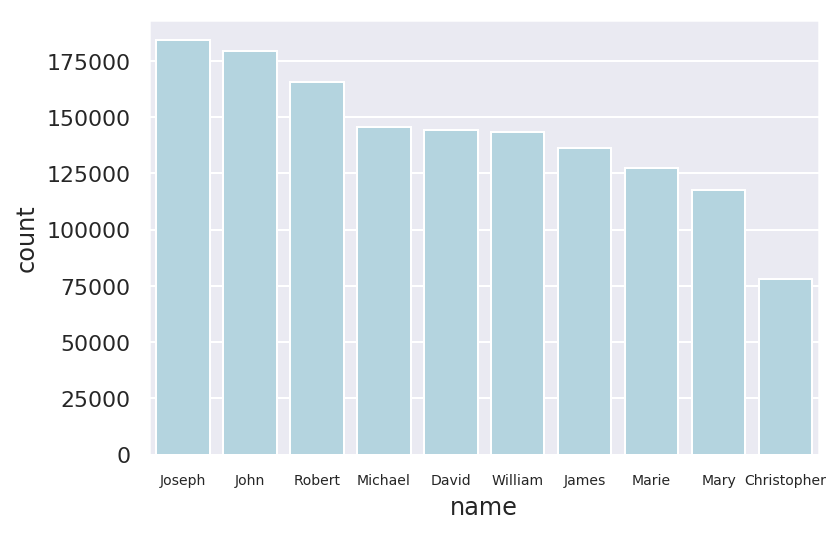

In [101]:
p = sns.barplot("name", "count", data=babynames_popularity, color="lightblue")
p.set_xticklabels(p.get_xticklabels(), size = 7)
pass

## Exercise 3.10
Use `groupby()` to calculate the total number of children born for every year.

Plot the results as a line graph: total vs year.

In [ ]:
imdone(3,10)

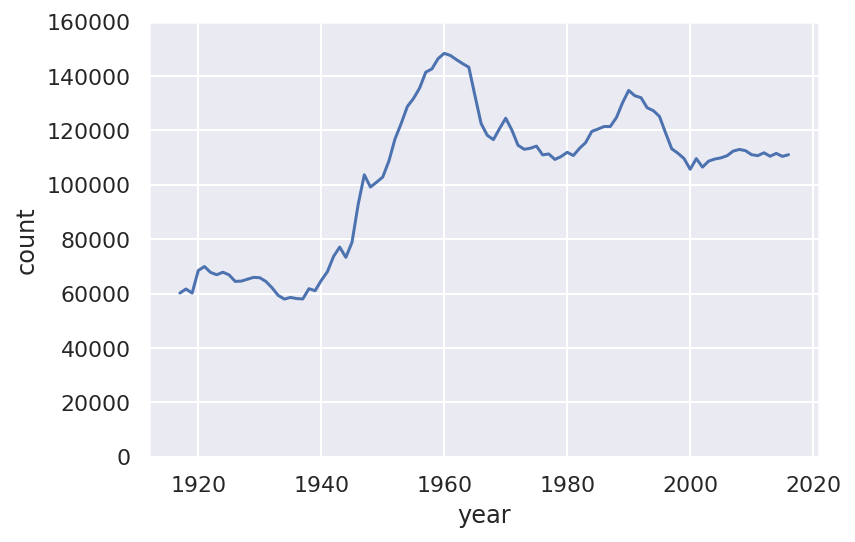

In [139]:
# Solution (HIDEME)
babynames_year = babynames.groupby("year")
babynames_year = babynames_year[["count"]]
babynames_year = babynames_year.sum()
babynames_year = babynames_year.reset_index()
babynames_year
p = sns.lineplot("year", "count", data=babynames_year)

# Bonus: Set y-axis range
p.set(ylim=(0,160000))
pass

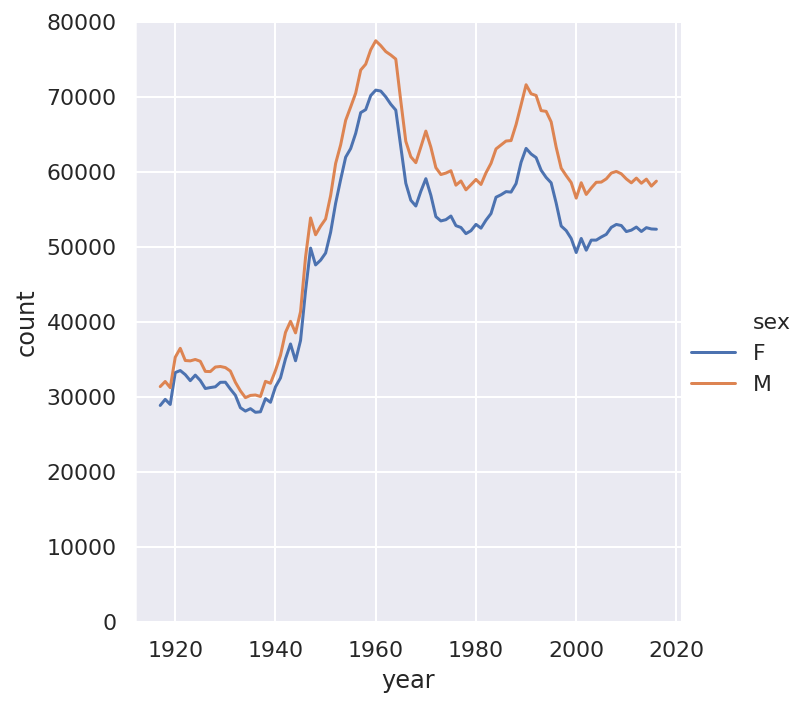

In [26]:
# Bonus material (HIDEME)
babynames_year = babynames.groupby(["year", "sex"])
babynames_year = babynames_year[["count"]]
babynames_year = babynames_year.sum()
babynames_year = babynames_year.reset_index()
babynames_year
p = sns.relplot("year", "count", data=babynames_year, kind="line", hue="sex")
p.set(ylim=(0,80000))
pass

## Mutating data

We can add new columns to data frames on the fly which can be calculated.

In [4]:
babynames["percentage"] = 100*babynames["prop"]

In [8]:
babynames[babynames["count"]>0].head()

,year,sex,name,count,prop,percentage
96,2013,F,Aadhya,13,0.000216,0.021605
97,2014,F,Aadhya,12,0.000199,0.019943
99,2016,F,Aadhya,8,0.000133,0.013295
196,2013,F,Aadya,6,0.000100,0.009971
198,2015,F,Aadya,9,0.000150,0.014957


In [11]:
babynames["nper"] = np.round(babynames["percentage"])

In [13]:
babynames[babynames["nper"]>0].head()

,year,sex,name,count,prop,percentage,nper
3584,2001,F,Abigail,463,0.007695,0.769461,1.0
3585,2002,F,Abigail,480,0.007977,0.797713,1.0
3586,2003,F,Abigail,512,0.008509,0.850894,1.0
3587,2004,F,Abigail,488,0.008110,0.811008,1.0
3588,2005,F,Abigail,505,0.008393,0.839261,1.0


## Saving Data
To save our modified data, we can use another pandas function similar to `read_csv`. This function is called `to_csv()` and can be applied directly to a data frame.

In [28]:
babynames_year.to_csv("test.csv")